# Flight Delays and Cancellations

In this notebook we are going to do EDA for [2015 Flight Delays and Cancellations](https://www.kaggle.com/usdot/flight-delays) dataset from [Kaggle](https://www.kaggle.com/).


In [2]:
import numpy as np
import csv
import operator
import pandas as pd
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16,  10)

## Load dataset:

The dataset contains 3 CSV files:

* airlines.csv: contains information about airlines.
    * **IATA_CODE**: unique identifier.
    * **AIRLINE**.

* airports.csv: contains information about airports.
    * **IATA_CODE**: unique identifier.
    * **AIRPORT**.
    * **CITY**.
    * **LATITUDE**.
    * **LONGITUDE**.

* flights.csv: contains 33 columns related to flight information.
               

In [3]:
airlines_data = pd.read_csv('airlines.csv')
airports_data = pd.read_csv('airports.csv')
flights_data = pd.read_csv('flights.csv')
# flights_data=flights_data[1:900]

In [4]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
airports_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Keep 25 columns out of 33. In general, we are going to use these columns to study flights using their delation,cancellation,cancellation reasons,time,speed,and changing direction(divert).

Using the previous properties, we are going to help the passengers to choose the best airline to travel. 

In [7]:
flights_data.columns.values
flights_data=flights_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME','DISTANCE', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

flights_data does not contain the namd of airline (just contains the unique identifier) so we are going to add new column **AIRLINE_NAME** to flight_data from airlines_data.

In [8]:
flights_data["AIRLINE_NAME"]=flights_data.apply(lambda x: airlines_data.loc[airlines_data['IATA_CODE'] == x["AIRLINE"],"AIRLINE"].values[0],axis=1)

In [38]:
flights_data[["AIRLINE_NAME","AIRLINE","ORIGIN_AIRPORT"]].head()

,AIRLINE_NAME,AIRLINE,ORIGIN_AIRPORT
0,American Airlines Inc.,AA,LAX
1,US Airways Inc.,US,SFO
2,American Airlines Inc.,AA,LAX
3,Alaska Airlines Inc.,AS,SEA
4,Delta Air Lines Inc.,DL,SFO


Add the origin airports names to flight_data from airports_data.

In [10]:
flights_data["ORIGIN_AIRPORT_NAME"]=flights_data.apply(lambda x: airports_data.loc[airports_data['IATA_CODE'] == x["ORIGIN_AIRPORT"],"AIRPORT"].values[0],axis=1)

In [11]:
flights_data[["AIRLINE_NAME","ORIGIN_AIRPORT","ORIGIN_AIRPORT_NAME"]].head()

,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_AIRPORT_NAME
0,American Airlines Inc.,LAX,Los Angeles International Airport
1,US Airways Inc.,SFO,San Francisco International Airport
2,American Airlines Inc.,LAX,Los Angeles International Airport
3,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport
4,Delta Air Lines Inc.,SFO,San Francisco International Airport


General Information about the flights data:

In [12]:
#General Info
number_of_delayed = flights_data["DEPARTURE_DELAY"].apply(lambda s: 1 if s!=0 else 0);
print("Total number of flights: "+str(len(flights_data)))
print("Number of cancelled flights: "+str(sum(flights_data["CANCELLED"])))
print("Number of delayed flights: "+str(sum(number_of_delayed)))
print("Number of diverted flights: "+str(sum(flights_data["DIVERTED"])))


print("Number of not cancelled flights: "+str(len(flights_data)-sum(flights_data["CANCELLED"])))
print("Number of not delayed flights: "+str(len(flights_data)-sum(number_of_delayed)))
# print("The number of missing data: "+str(flights_data['DEPARTURE_TIME'].isnull().sum()));
print("Percentage of cancelled flights: "+str((sum(flights_data["CANCELLED"])*1.0/len(flights_data))*100)+"%")
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(flights_data))*100)+"%")

Total number of flights: 1048574
Number of cancelled flights: 40527
Number of delayed flights: 993983
Number of diverted flights: 2544
Number of not cancelled flights: 1008047
Number of not delayed flights: 54591
Percentage of cancelled flights: 3.86496327393%
Percentage of delayed flights: 94.7937866092%


Check the number of missing (empty) values for each column.

In [13]:
flights_data["ON_TIME"]=flights_data["ARRIVAL_DELAY"].apply(lambda row: 1 if row==0 else 0)
print(len(flights_data["AIRLINE_DELAY"]))
print("ON_TIME: "+str(flights_data["ON_TIME"].sum()))
missing_data_info={};
for column in flights_data.columns:
    missing_data_info[column]=flights_data[column].isnull().sum()
missing_data_info_sorted = sorted(missing_data_info.items(), key=operator.itemgetter(1))
missing_data_info_sorted

1048574
ON_TIME: 22411


[('SCHEDULED_ARRIVAL', 0),
 ('AIRLINE', 0),
 ('DIVERTED', 0),
 ('ORIGIN_AIRPORT', 0),
 ('ORIGIN_AIRPORT_NAME', 0),
 ('FLIGHT_NUMBER', 0),
 ('DAY', 0),
 ('SCHEDULED_DEPARTURE', 0),
 ('AIRLINE_NAME', 0),
 ('DAY_OF_WEEK', 0),
 ('YEAR', 0),
 ('CANCELLED', 0),
 ('DISTANCE', 0),
 ('ON_TIME', 0),
 ('DESTINATION_AIRPORT', 0),
 ('MONTH', 0),
 ('SCHEDULED_TIME', 2),
 ('TAIL_NUMBER', 7750),
 ('DEPARTURE_DELAY', 39515),
 ('DEPARTURE_TIME', 39515),
 ('ARRIVAL_TIME', 41296),
 ('ARRIVAL_DELAY', 43071),
 ('AIR_SYSTEM_DELAY', 820046),
 ('AIRLINE_DELAY', 820046),
 ('WEATHER_DELAY', 820046),
 ('SECURITY_DELAY', 820046),
 ('LATE_AIRCRAFT_DELAY', 820046),
 ('CANCELLATION_REASON', 1008047)]

We noticed that the number of missing data in CANCELLATION_REASON is large and that is because when the flight was not cancelled (it was delayed or on time), no value was added.

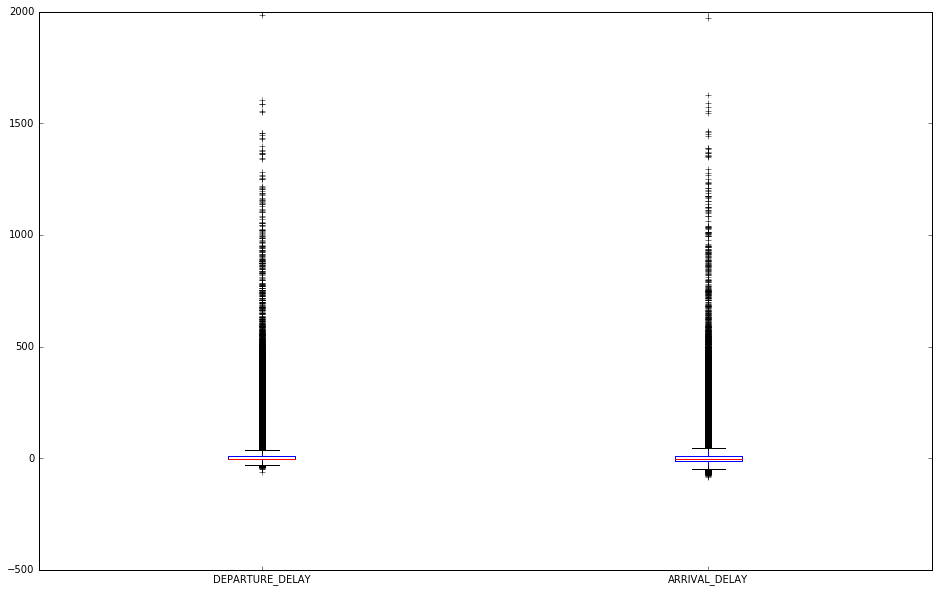

In [14]:
flights_data[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].plot.box()

We notice from the previous plot that there are some negative values and that means there are some flights took off before few minutes before the exact time. We are going to call that flights ahead_flights and the other one delayed_flights

**get_airline_information** this function will help to filter and add new column to airlines_data.

In [15]:
def get_airline_information(column_name,airline_dataframe,flight_dataframe):
    return airline_dataframe.apply(lambda x: flight_dataframe.loc[x["IATA_CODE"]==flight_dataframe["AIRLINE"],column_name].values[0] if len(flight_dataframe.loc[x["IATA_CODE"]==flight_dataframe["AIRLINE"],column_name])>0 else 0,axis=1)

## Calculate the percentage of cancelled and delayed flights for each Airline:

In [16]:
cancelled_flights = flights_data
grouped_cancelled_flights=cancelled_flights[["AIRLINE","AIRLINE_NAME","CANCELLED","ON_TIME"]].groupby(['AIRLINE','AIRLINE_NAME']).sum().reset_index()
grouped_cancelled_flights["FLIGHTS_COUNT"]=cancelled_flights[["AIRLINE","AIRLINE_NAME","ON_TIME"]].groupby(['AIRLINE','AIRLINE_NAME']).count().reset_index()["ON_TIME"]
grouped_cancelled_flights["CANCELLED_PERCENTAGE"]=grouped_cancelled_flights["CANCELLED"]*1.0/grouped_cancelled_flights["FLIGHTS_COUNT"]*100
grouped_cancelled_flights["ON_TIME_PERCENTAGE"]=grouped_cancelled_flights["ON_TIME"]*1.0/grouped_cancelled_flights["FLIGHTS_COUNT"]*100
grouped_cancelled_flights[["AIRLINE","AIRLINE_NAME","FLIGHTS_COUNT","CANCELLED","ON_TIME","CANCELLED_PERCENTAGE","ON_TIME_PERCENTAGE"]].sort_values(by=['CANCELLED_PERCENTAGE'],ascending=[False])

,AIRLINE,AIRLINE_NAME,FLIGHTS_COUNT,CANCELLED,ON_TIME,CANCELLED_PERCENTAGE,ON_TIME_PERCENTAGE
7,MQ,American Eagle Airlines Inc.,65513,7727,1191,11.794606,1.817960
4,EV,Atlantic Southeast Airlines,111206,6274,2475,5.641782,2.225599
2,B6,JetBlue Airways,48157,2645,873,5.492452,1.812821
0,AA,American Airlines Inc.,97549,4685,2033,4.802715,2.084081
11,US,US Airways Inc.,73942,3143,1603,4.250629,2.167915
13,WN,Southwest Airlines Co.,221586,6606,4976,2.981235,2.245629
9,OO,Skywest Airlines Inc.,107099,2983,2440,2.785273,2.278266
10,UA,United Air Lines Inc.,87606,2403,1755,2.742963,2.003287
12,VX,Virgin America,10403,276,233,2.653081,2.239739
8,NK,Spirit Air Lines,19612,461,376,2.350602,1.917194


* Add a new column **FLIGHTS_COUNT**      to airlines_data which represents the total count of flights.
* Add a new column **ON_TIME**            to airlines_data which represents the count of flights that were exactly on time.
* Add a new column **ON_TIME_PERCENTAGE** to airlines_data which we can use it to sort the data and decide which airline is better.  


In [17]:
airlines_data["FLIGHTS_COUNT"]=get_airline_information("FLIGHTS_COUNT",airlines_data,grouped_cancelled_flights)
airlines_data["ON_TIME"]=get_airline_information("ON_TIME",airlines_data,grouped_cancelled_flights)
airlines_data["ON_TIME_PERCENTAGE"]=get_airline_information("ON_TIME_PERCENTAGE",airlines_data,grouped_cancelled_flights)
airlines_data.sort_values(by="ON_TIME_PERCENTAGE",ascending=False)

,IATA_CODE,AIRLINE,FLIGHTS_COUNT,ON_TIME,ON_TIME_PERCENTAGE
11,HA,Hawaiian Airlines Inc.,14133,653,4.620392
6,AS,Alaska Airlines Inc.,29613,678,2.289535
5,OO,Skywest Airlines Inc.,107099,2440,2.278266
8,WN,Southwest Airlines Co.,221586,4976,2.245629
13,VX,Virgin America,10403,233,2.239739
10,EV,Atlantic Southeast Airlines,111206,2475,2.225599
2,US,US Airways Inc.,73942,1603,2.167915
1,AA,American Airlines Inc.,97549,2033,2.084081
0,UA,United Air Lines Inc.,87606,1755,2.003287
3,F9,Frontier Airlines Inc.,14669,292,1.990592


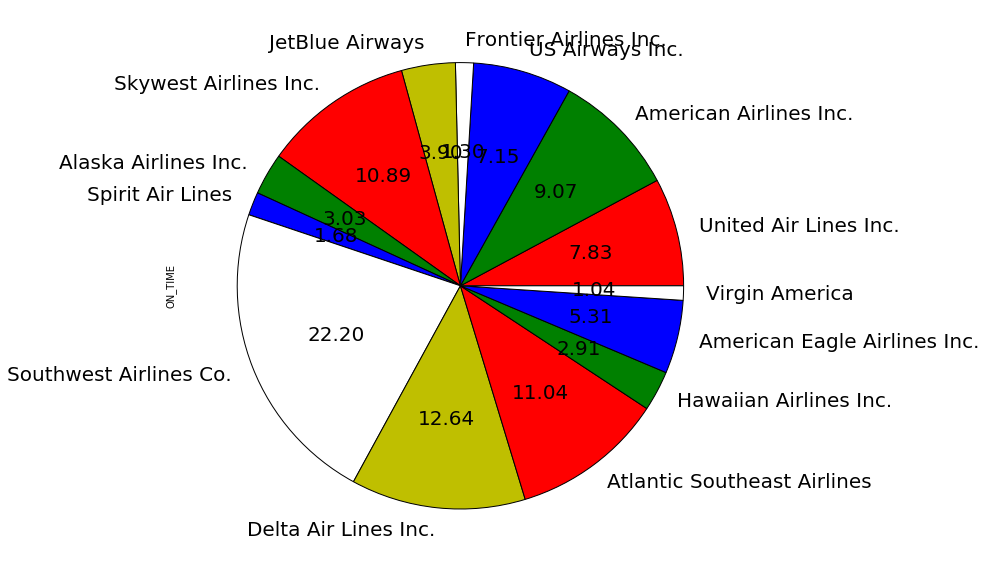

In [18]:
airlines_data["ON_TIME"].plot.pie(labels=airlines_data["AIRLINE"],autopct='%.2f', fontsize=20, figsize=(10, 10),colors=['r','g','b','w','y'])

/Users/Soubhi/anaconda/lib/python2.7/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


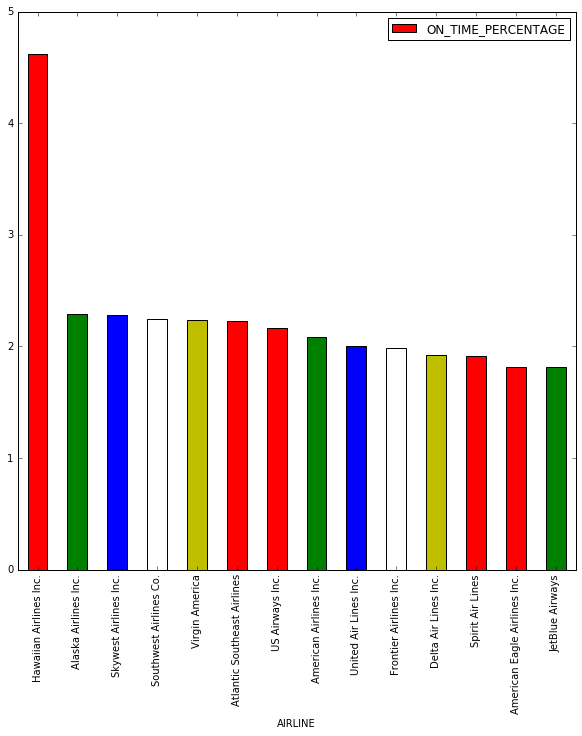

In [19]:
airlines_data.sort_values(by=["ON_TIME_PERCENTAGE"],ascending=False).plot(x="AIRLINE",y='ON_TIME_PERCENTAGE',kind='bar', figsize=(10, 10),colors=['r','g','b','w','y'])

As we said **DEPARTURE_DELAY** column there are some negative values and that means that the flight took off before the time. We are going to calculate the mean for delayed flights and mean for ahead flights for each of the airlines. 

In [20]:
#Delay by Airlines
positive_delayed_flight=flights_data
positive_delayed_flight=positive_delayed_flight[positive_delayed_flight['DEPARTURE_DELAY']>=0]
positive_delayed_flight_grouped=positive_delayed_flight[["AIRLINE","AIRLINE_NAME","DEPARTURE_DELAY"]].groupby(["AIRLINE",'AIRLINE_NAME']).mean().reset_index()

In [21]:
airlines_data["MEAN_DEPARTURE_DELAY"]=get_airline_information("DEPARTURE_DELAY",airlines_data,positive_delayed_flight_grouped)
airlines_data[["AIRLINE","ON_TIME_PERCENTAGE","MEAN_DEPARTURE_DELAY"]].sort_values(by="MEAN_DEPARTURE_DELAY",ascending=True).head()

,AIRLINE,ON_TIME_PERCENTAGE,MEAN_DEPARTURE_DELAY
11,Hawaiian Airlines Inc.,4.620392,15.518927
8,Southwest Airlines Co.,2.245629,22.396647
6,Alaska Airlines Inc.,2.289535,25.722779
2,US Airways Inc.,2.167915,26.004740
9,Delta Air Lines Inc.,1.920860,26.150668


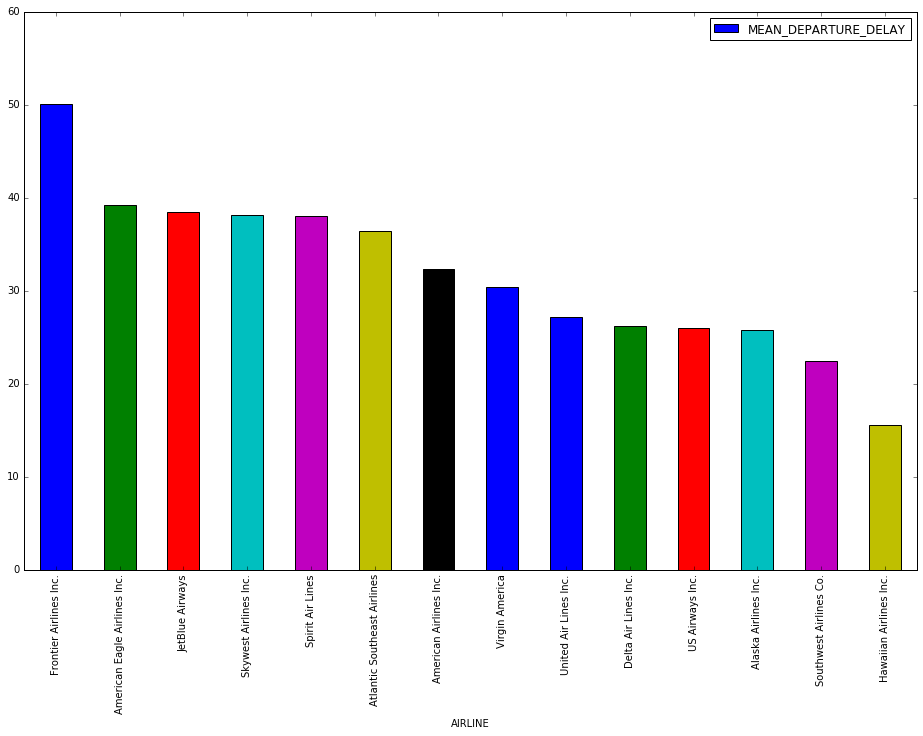

In [22]:
#Mean delay for each airlines
airlines_data.sort_values(by=["MEAN_DEPARTURE_DELAY"],ascending=False).plot(x="AIRLINE",y="MEAN_DEPARTURE_DELAY",kind='bar')

In [23]:
#Ahead flights by Airlines
ahead_flight=flights_data
ahead_flight=ahead_flight[ahead_flight['DEPARTURE_DELAY']<=0]
ahead_flight['DEPARTURE_DELAY']=ahead_flight['DEPARTURE_DELAY'].abs()
ahead_flight_grouped=ahead_flight[["AIRLINE","AIRLINE_NAME","DEPARTURE_DELAY"]].groupby(['AIRLINE','AIRLINE_NAME']).mean().reset_index()
ahead_flight_grouped.sort_values(by=["DEPARTURE_DELAY"],ascending=False)

/Users/Soubhi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,AIRLINE,AIRLINE_NAME,DEPARTURE_DELAY
1,AS,Alaska Airlines Inc.,6.717337
5,F9,Frontier Airlines Inc.,6.385953
9,OO,Skywest Airlines Inc.,5.529135
8,NK,Spirit Air Lines,5.508086
6,HA,Hawaiian Airlines Inc.,5.352643
4,EV,Atlantic Southeast Airlines,5.273309
2,B6,JetBlue Airways,5.247939
7,MQ,American Eagle Airlines Inc.,4.785321
0,AA,American Airlines Inc.,4.686126
11,US,US Airways Inc.,4.467147


In [24]:
airlines_data["MEAN_DEPARTURE_AHEAD"]=get_airline_information("DEPARTURE_DELAY",airlines_data,ahead_flight_grouped)
airlines_data[["AIRLINE","ON_TIME_PERCENTAGE","MEAN_DEPARTURE_DELAY"]].sort_values(by="MEAN_DEPARTURE_DELAY",ascending=True).head()

,AIRLINE,ON_TIME_PERCENTAGE,MEAN_DEPARTURE_DELAY
11,Hawaiian Airlines Inc.,4.620392,15.518927
8,Southwest Airlines Co.,2.245629,22.396647
6,Alaska Airlines Inc.,2.289535,25.722779
2,US Airways Inc.,2.167915,26.004740
9,Delta Air Lines Inc.,1.920860,26.150668


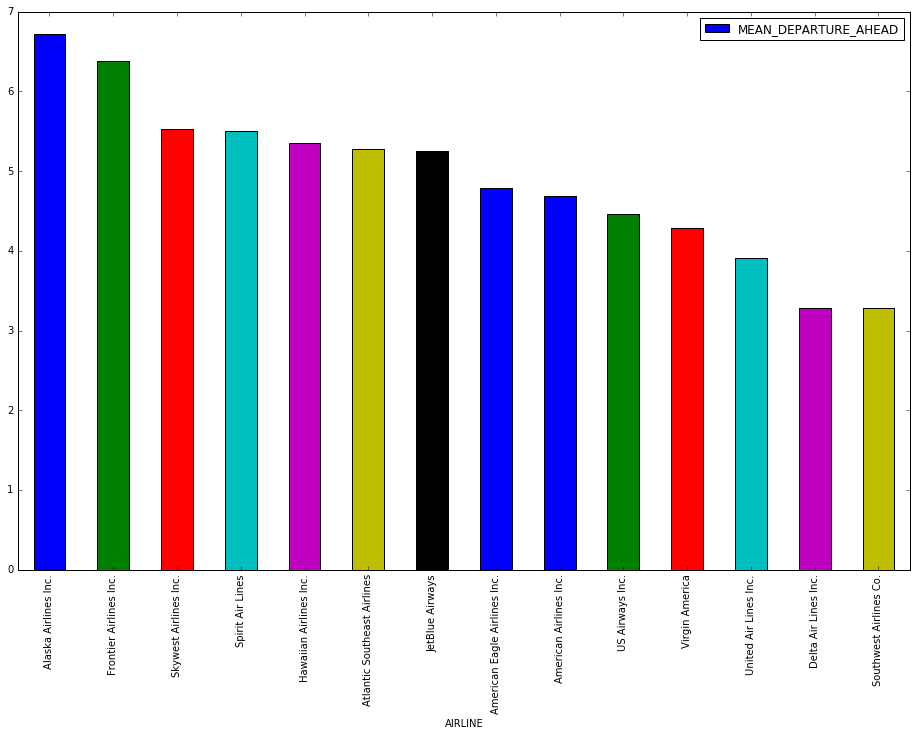

In [25]:
airlines_data.sort_values(by=["MEAN_DEPARTURE_AHEAD"],ascending=False).plot(x="AIRLINE",y="MEAN_DEPARTURE_AHEAD",kind='bar')

In [26]:
airlines_data[["AIRLINE","ON_TIME_PERCENTAGE","MEAN_DEPARTURE_DELAY","MEAN_DEPARTURE_AHEAD"]].sort_values(by=["MEAN_DEPARTURE_AHEAD"],ascending=False)

,AIRLINE,ON_TIME_PERCENTAGE,MEAN_DEPARTURE_DELAY,MEAN_DEPARTURE_AHEAD
6,Alaska Airlines Inc.,2.289535,25.722779,6.717337
3,Frontier Airlines Inc.,1.990592,50.063238,6.385953
5,Skywest Airlines Inc.,2.278266,38.137873,5.529135
7,Spirit Air Lines,1.917194,38.069052,5.508086
11,Hawaiian Airlines Inc.,4.620392,15.518927,5.352643
10,Atlantic Southeast Airlines,2.225599,36.433069,5.273309
4,JetBlue Airways,1.812821,38.461887,5.247939
12,American Eagle Airlines Inc.,1.817960,39.262470,4.785321
1,American Airlines Inc.,2.084081,32.329144,4.686126
2,US Airways Inc.,2.167915,26.004740,4.467147


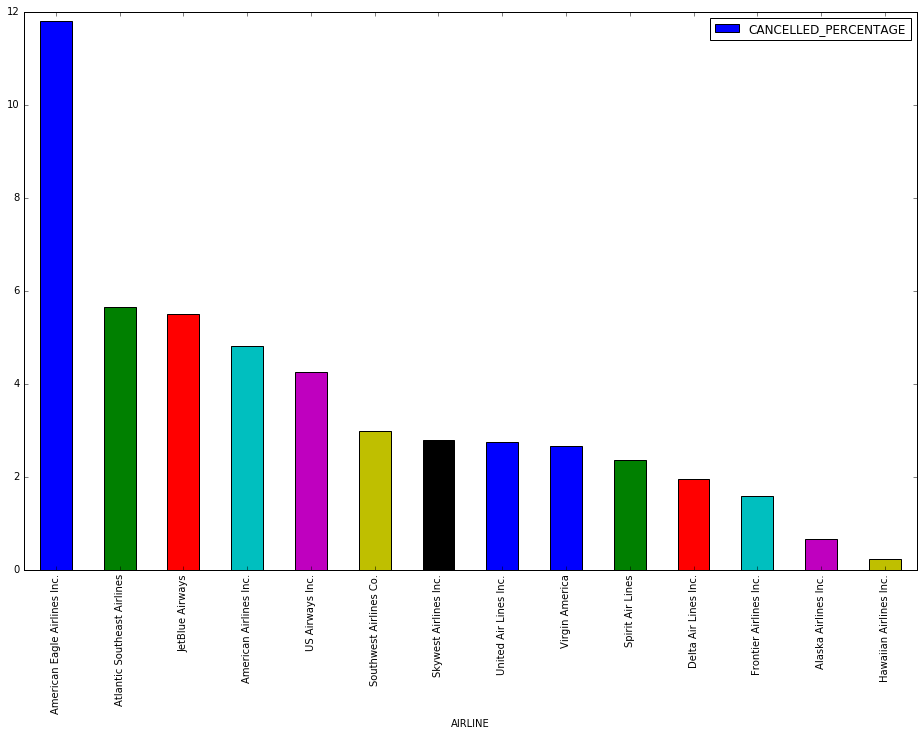

In [27]:
airlines_data["CANCELLED_PERCENTAGE"]=get_airline_information("CANCELLED_PERCENTAGE",airlines_data,grouped_cancelled_flights)
airlines_data.sort_values(by=["CANCELLED_PERCENTAGE"],ascending=False).plot(x="AIRLINE",y="CANCELLED_PERCENTAGE",kind='bar')

In [52]:
airlines_data[["AIRLINE","CANCELLED_PERCENTAGE"]].sort_values(by=["CANCELLED_PERCENTAGE"],ascending=True)

,AIRLINE,CANCELLED_PERCENTAGE
11,Hawaiian Airlines Inc.,0.233496
6,Alaska Airlines Inc.,0.665248
3,Frontier Airlines Inc.,1.588384
9,Delta Air Lines Inc.,1.939845
7,Spirit Air Lines,2.350602
13,Virgin America,2.653081
0,United Air Lines Inc.,2.742963
5,Skywest Airlines Inc.,2.785273
8,Southwest Airlines Co.,2.981235
2,US Airways Inc.,4.250629


In [28]:
#Percentage by AIRLINES for diverted flights
diverted_flights = flights_data#.drop(flights_data[flights_data["CANCELLED"] != 1].index)
diverted_flights=diverted_flights[["AIRLINE","AIRLINE_NAME","DIVERTED"]].groupby(['AIRLINE','AIRLINE_NAME']).sum().reset_index()
diverted_flights.sort_values(by=["DIVERTED"],ascending=True).head(3)

,AIRLINE,AIRLINE_NAME,DIVERTED
6,HA,Hawaiian Airlines Inc.,12
5,F9,Frontier Airlines Inc.,18
8,NK,Spirit Air Lines,25


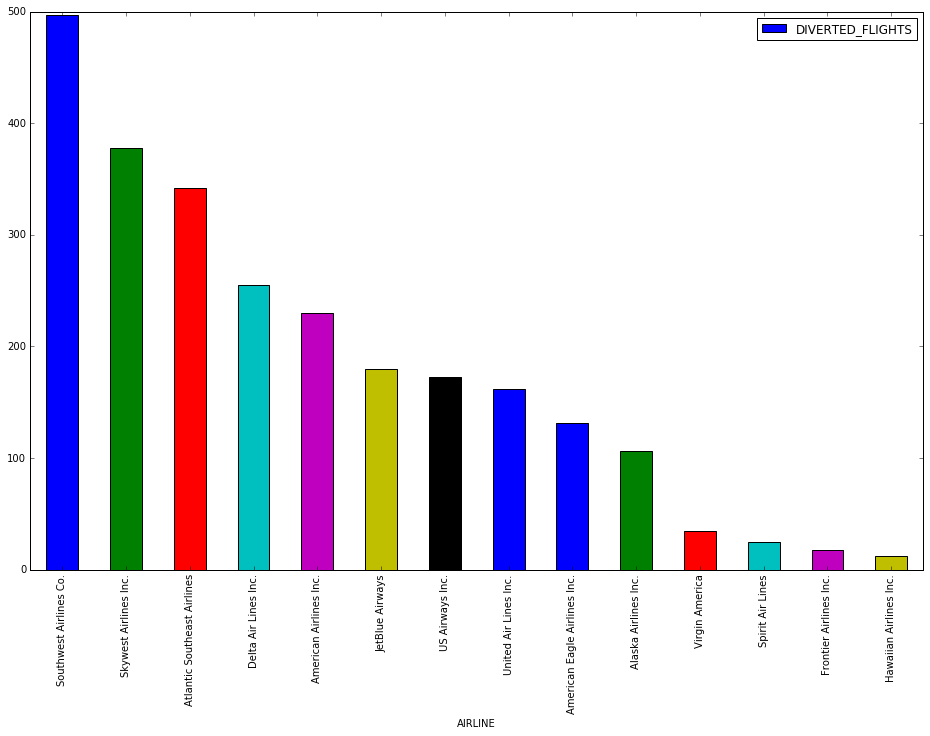

In [29]:
airlines_data["DIVERTED_FLIGHTS"]=get_airline_information("DIVERTED",airlines_data,diverted_flights)
airlines_data.sort_values(by=["DIVERTED_FLIGHTS"],ascending=False).plot(x="AIRLINE",y="DIVERTED_FLIGHTS",kind='bar')

### Cancelled Flights

In [30]:
#CANCELLATION_REASON PERCENTAGE
cancellation_reasons_flights = flights_data
cancellation_reasons_flights=cancellation_reasons_flights[["CANCELLATION_REASON","CANCELLED"]].groupby(['CANCELLATION_REASON']).sum().reset_index()
cancellation_reasons_flights["CANCELLATION_REASON_PERCENTAGE"]=cancellation_reasons_flights["CANCELLED"]/sum(flights_data["CANCELLED"])
print("A - Carrier; B - Weather; C - National Air System; D - Security")
cancellation_reasons_flights

A - Carrier; B - Weather; C - National Air System; D - Security


,CANCELLATION_REASON,CANCELLED,CANCELLATION_REASON_PERCENTAGE
0,A,6974,0.172083
1,B,28260,0.697313
2,C,5291,0.130555
3,D,2,0.000049


In [31]:
#CANCELLATION_REASON FOR AIRLINES
cancellation_reasons_flights = flights_data
cancellation_reasons_flights=cancellation_reasons_flights[["CANCELLED","AIRLINE","AIRLINE_NAME","CANCELLATION_REASON"]].groupby(['AIRLINE','AIRLINE_NAME','CANCELLATION_REASON']).sum().reset_index()
print("A - Carrier; B - Weather; C - National Air System; D - Security")
cancellation_reasons_flights.sort_values(by=['CANCELLED'],ascending=[False])

A - Carrier; B - Weather; C - National Air System; D - Security


,AIRLINE,AIRLINE_NAME,CANCELLATION_REASON,CANCELLED
20,MQ,American Eagle Airlines Inc.,B,5483
39,WN,Southwest Airlines Co.,B,5030
1,AA,American Airlines Inc.,B,4131
15,EV,Atlantic Southeast Airlines,C,2915
11,DL,Delta Air Lines Inc.,B,2641
33,US,US Airways Inc.,B,2405
7,B6,JetBlue Airways,B,2335
30,UA,United Air Lines Inc.,B,1989
27,OO,Skywest Airlines Inc.,B,1947
14,EV,Atlantic Southeast Airlines,B,1694


In [32]:
def create_airlines_cancellation_table(reason_code,airlines_dataframe,cancellation_reasons_dataframe):
    tmp_cancellation_reasons=cancellation_reasons_dataframe[cancellation_reasons_dataframe["CANCELLATION_REASON"]==reason_code]
    return airlines_dataframe.apply(lambda x: tmp_cancellation_reasons.loc[x["IATA_CODE"]==tmp_cancellation_reasons["AIRLINE"],"CANCELLED"].values[0] if len(tmp_cancellation_reasons.loc[x["IATA_CODE"]==tmp_cancellation_reasons["AIRLINE"],"CANCELLED"])>0 else 0,axis=1)

    

In [33]:
airlines_cancellation_reasons=airlines_data;
airlines_cancellation_reasons["CARRIER"]=create_airlines_cancellation_table("A",airlines_cancellation_reasons,cancellation_reasons_flights)
airlines_cancellation_reasons["WEATHER"]=create_airlines_cancellation_table("B",airlines_cancellation_reasons,cancellation_reasons_flights)
airlines_cancellation_reasons["AIR_SYS"]=create_airlines_cancellation_table("C",airlines_cancellation_reasons,cancellation_reasons_flights)
airlines_cancellation_reasons["SECURITY"]=create_airlines_cancellation_table("D",airlines_cancellation_reasons,cancellation_reasons_flights)
airlines_cancellation_reasons

,IATA_CODE,AIRLINE,FLIGHTS_COUNT,ON_TIME,ON_TIME_PERCENTAGE,MEAN_DEPARTURE_DELAY,MEAN_DEPARTURE_AHEAD,CANCELLED_PERCENTAGE,DIVERTED_FLIGHTS,CARRIER,WEATHER,AIR_SYS,SECURITY
0,UA,United Air Lines Inc.,87606,1755,2.003287,27.165014,3.905644,2.742963,162,328,1989,86,0
1,AA,American Airlines Inc.,97549,2033,2.084081,32.329144,4.686126,4.802715,230,533,4131,21,0
2,US,US Airways Inc.,73942,1603,2.167915,26.004740,4.467147,4.250629,173,524,2405,214,0
3,F9,Frontier Airlines Inc.,14669,292,1.990592,50.063238,6.385953,1.588384,18,121,112,0,0
4,B6,JetBlue Airways,48157,873,1.812821,38.461887,5.247939,5.492452,180,196,2335,113,1
5,OO,Skywest Airlines Inc.,107099,2440,2.278266,38.137873,5.529135,2.785273,378,682,1947,354,0
6,AS,Alaska Airlines Inc.,29613,678,2.289535,25.722779,6.717337,0.665248,106,71,124,2,0
7,NK,Spirit Air Lines,19612,376,1.917194,38.069052,5.508086,2.350602,25,73,366,21,1
8,WN,Southwest Airlines Co.,221586,4976,2.245629,22.396647,3.285433,2.981235,497,1405,5030,171,0
9,DL,Delta Air Lines Inc.,147486,2833,1.920860,26.150668,3.285799,1.939845,255,119,2641,101,0


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


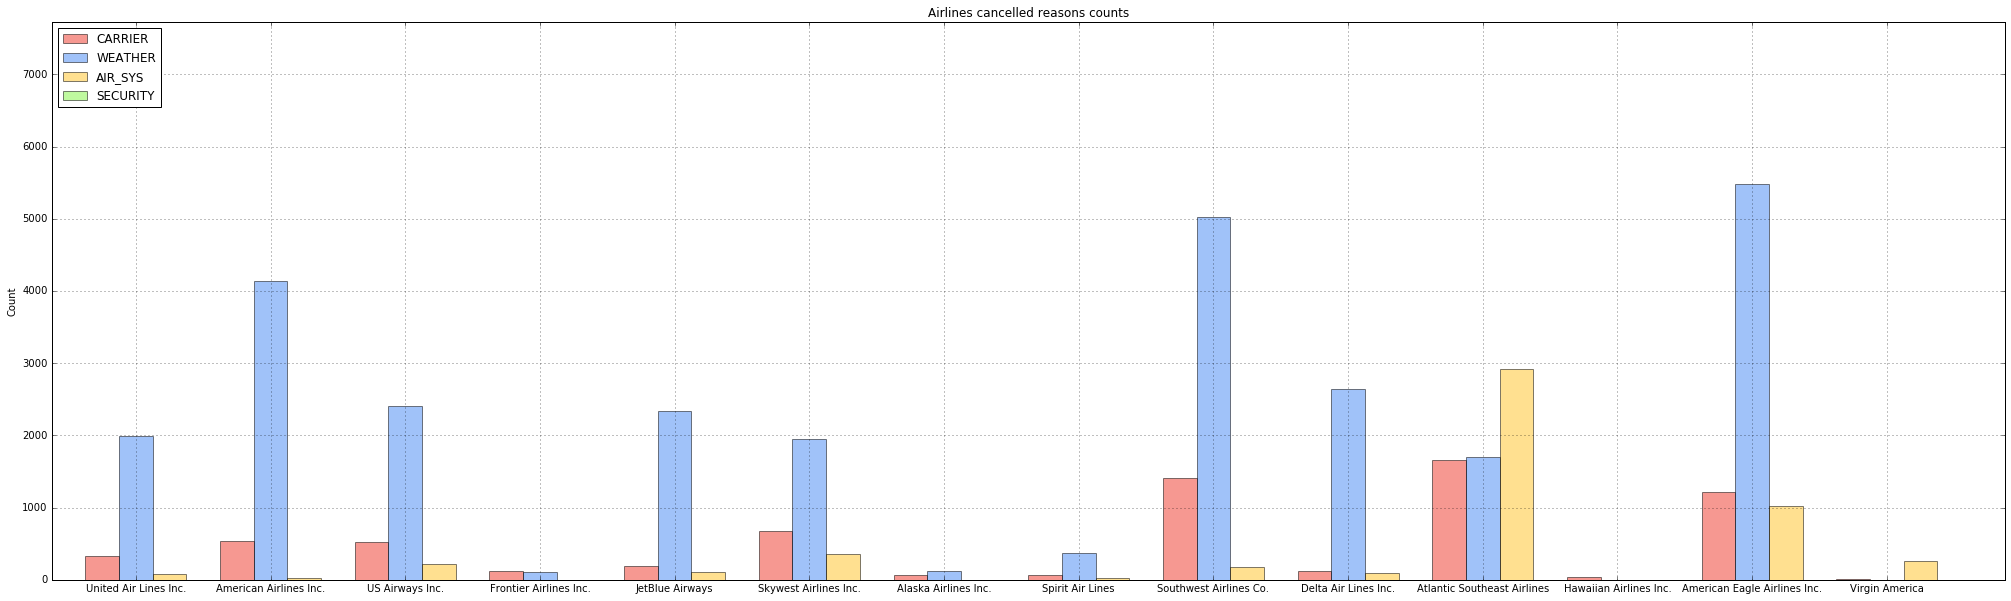

In [34]:
# Setting the positions and width for the bars
pos = list(range(len(airlines_cancellation_reasons['AIRLINE']))) 
print pos
width = 0.25 
# Plotting the bars
fig, ax = plt.subplots(figsize=(35,10))

plt.bar(pos, 
        airlines_cancellation_reasons['CARRIER'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=airlines_cancellation_reasons['CARRIER'][0])

plt.bar([p + width for p in pos], 
        airlines_cancellation_reasons['WEATHER'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4286f4', 
        # with label the first value in first_name
        label=airlines_cancellation_reasons['WEATHER'][0])


plt.bar([p + width*2 for p in pos], 
        airlines_cancellation_reasons['AIR_SYS'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=airlines_cancellation_reasons['AIR_SYS'][0])

plt.bar([p + width*3 for p in pos], 
        airlines_cancellation_reasons['SECURITY'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#80f441', 
        # with label the first value in first_name
        label=airlines_cancellation_reasons['SECURITY'][0])

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Airlines cancelled reasons counts')
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(airlines_cancellation_reasons['AIRLINE'])

plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(airlines_cancellation_reasons['SECURITY'] + airlines_cancellation_reasons['AIR_SYS'] + airlines_cancellation_reasons['WEATHER']+airlines_cancellation_reasons["CARRIER"])] )

# Adding the legend and showing the plot
plt.legend(['CARRIER',"WEATHER", 'AIR_SYS', 'SECURITY'], loc='upper left')
plt.grid()
plt.show()

## Speed

We have **DEPARTURE_TIME**,**ARRIVAL_TIME**,**YEAR**,**MONTH** and **DAY** in flights_data.
* We notice that **DEPARTURE_TIME** and **ARRIVAL_TIME** are represtened by 2,3 or 4-digits. These digits represent the time for the flight hhmm.
 When there are just 2-digits like 33 that means the time is 00:33.
 When there are just 3-digits like 133 that means the time is 01:33.
 We want to make all values consist of 4-digits by adding zeros to left.
 
* After converting all **DEPARTURE_TIME** and **ARRIVAL_TIME** values to 4-digits, we will use **YEAR**,**MONTH** and **DAY** to create new columns **DEPARTURE_DATE** and **ARRIVAL_DATE**. Each of these columns is from datetime type so that we can calculate the duration between DEPARTURE_TIME and ARRIVAL_TIME easily and use it to calculate the mean speed for the flight.

In [35]:
#make the time 4-digits to all departure records
flights_data['DEPARTURE_TIME']=flights_data['DEPARTURE_TIME'].fillna(0)
flights_data['DEPARTURE_TIME']=flights_data['DEPARTURE_TIME'].astype(int)
flights_data['SCHEDULED_DEPARTURE']=flights_data['SCHEDULED_DEPARTURE'].apply(lambda x: "0"+str(x) if (x<999 and x>99) else "00"+str(x) if x<100 else x)
flights_data['DEPARTURE_TIME']=flights_data['DEPARTURE_TIME'].apply(lambda x: "0"+str(x) if (x<999 and x>99) else "00"+str(x) if x<100 else x)

# #combine time with data and formate it
flights_data['SCHEDULED_DEPARTURE_DATE']=flights_data[['SCHEDULED_DEPARTURE','YEAR','MONTH','DAY']].apply(lambda x: str(x['YEAR'])+"-"+str(x['MONTH'])+"-"+str(x['DAY'])+"-"+str(x['SCHEDULED_DEPARTURE']),axis=1)
flights_data['SCHEDULED_DEPARTURE_DATE']=pd.to_datetime(flights_data['SCHEDULED_DEPARTURE_DATE'], format='%Y-%m-%d-%H%M', errors='coerce')

flights_data['DEPARTURE_DATE']=flights_data[['DEPARTURE_TIME','YEAR','MONTH','DAY']].apply(lambda x: str(x['YEAR'])+"-"+str(x['MONTH'])+"-"+str(x['DAY'])+"-"+str(x['DEPARTURE_TIME']),axis=1)
flights_data['DEPARTURE_DATE']=pd.to_datetime(flights_data['DEPARTURE_DATE'], format='%Y-%m-%d-%H%M', errors='coerce')

In [36]:
flights_data['DEPARTURE_DATE'].head()

0   2015-01-01 00:02:00
1   2015-01-01 00:18:00
2   2015-01-01 00:15:00
3   2015-01-01 00:24:00
4   2015-01-01 00:20:00
Name: DEPARTURE_DATE, dtype: datetime64[ns]

In [37]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT_NAME,ON_TIME,SCHEDULED_DEPARTURE_DATE,DEPARTURE_DATE
0,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,0,2015-01-01 00:10:00,2015-01-01 00:02:00
1,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,0,2015-01-01 00:20:00,2015-01-01 00:18:00
2,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,0,2015-01-01 00:20:00,2015-01-01 00:15:00
3,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,0,2015-01-01 00:25:00,2015-01-01 00:24:00
4,2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,...,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,San Francisco International Airport,0,2015-01-01 00:25:00,2015-01-01 00:20:00


In [39]:
#make the time 4-digits to all arrival records
flights_data['ARRIVAL_TIME']=flights_data['ARRIVAL_TIME'].fillna(0)
flights_data['ARRIVAL_TIME']=flights_data['ARRIVAL_TIME'].astype(int)
flights_data['SCHEDULED_ARRIVAL']=flights_data['SCHEDULED_ARRIVAL'].apply(lambda x: "0"+str(x) if (x<999 and x>99) else "00"+str(x) if x<100 else x)
flights_data['ARRIVAL_TIME']=flights_data['ARRIVAL_TIME'].apply(lambda x: "0"+str(x) if (x<999 and x>99) else "00"+str(x) if x<100 else x)

#combine time with data and formate it
flights_data['SCHEDULED_ARRIVAL_DATE']=flights_data[['SCHEDULED_ARRIVAL','YEAR','MONTH','DAY']].apply(lambda x: str(x['YEAR'])+"-"+str(x['MONTH'])+"-"+str(x['DAY'])+"-"+str(x['SCHEDULED_ARRIVAL']),axis=1)
flights_data['SCHEDULED_ARRIVAL_DATE']=pd.to_datetime(flights_data['SCHEDULED_ARRIVAL_DATE'], format='%Y-%m-%d-%H%M', errors='coerce')

flights_data['ARRIVAL_DATE']=flights_data[['ARRIVAL_TIME','YEAR','MONTH','DAY']].apply(lambda x: str(x['YEAR'])+"-"+str(x['MONTH'])+"-"+str(x['DAY'])+"-"+str(x['ARRIVAL_TIME']),axis=1)
flights_data['ARRIVAL_DATE']=pd.to_datetime(flights_data['ARRIVAL_DATE'], format='%Y-%m-%d-%H%M', errors='coerce')


In [40]:
flights_data["ARRIVAL_TIME"].head()

0    0741
1    0811
2    0756
3    0259
4    0610
Name: ARRIVAL_TIME, dtype: object

Now we are going to calculate the difference between **ARRIVAL_DATE** and **DEPARTURE_DATE** which gives the duration for the flights.

In [41]:
flights_data["FLIGHT_TIME"]=flights_data['ARRIVAL_DATE']-flights_data['DEPARTURE_DATE']

In [42]:
flights_data[["ARRIVAL_DATE","DEPARTURE_DATE",'FLIGHT_TIME']].head()

,ARRIVAL_DATE,DEPARTURE_DATE,FLIGHT_TIME
0,2015-01-01 07:41:00,2015-01-01 00:02:00,07:39:00
1,2015-01-01 08:11:00,2015-01-01 00:18:00,07:53:00
2,2015-01-01 07:56:00,2015-01-01 00:15:00,07:41:00
3,2015-01-01 02:59:00,2015-01-01 00:24:00,02:35:00
4,2015-01-01 06:10:00,2015-01-01 00:20:00,05:50:00


Add new Column **FLIGHT_TIME_IN_MINUTES** which represents the flight duration (**FLIGHT_TIME**) in minutes.

In [43]:
flights_data["FLIGHT_TIME_IN_MINUTES"]=flights_data['FLIGHT_TIME'].apply(lambda x: int(x.seconds/60) if x.seconds>0 else 0)

Speed = Distance/time

In [44]:
flights_data['SPEED']=flights_data.apply(lambda x: x["DISTANCE"]/x['FLIGHT_TIME_IN_MINUTES'] if x['FLIGHT_TIME_IN_MINUTES']>0 else 0,axis=1)

In [45]:
flights_data[['SPEED','DISTANCE','FLIGHT_TIME_IN_MINUTES','ARRIVAL_DATE','DEPARTURE_DATE']].sort_values(by=["SPEED"],ascending=False)

,SPEED,DISTANCE,FLIGHT_TIME_IN_MINUTES,ARRIVAL_DATE,DEPARTURE_DATE
1017061,1855,3711,2,2015-03-08 13:02:00,2015-03-08 13:00:00
1013628,795,795,1,2015-03-08 08:46:00,2015-03-08 08:45:00
673527,795,795,1,2015-02-14 11:22:00,2015-02-14 11:21:00
1003749,795,795,1,2015-03-07 13:51:00,2015-03-07 13:50:00
642135,795,795,1,2015-02-12 11:36:00,2015-02-12 11:35:00
578958,775,775,1,2015-02-08 11:05:00,2015-02-08 11:04:00
461007,775,775,1,2015-01-31 09:05:00,2015-01-31 09:04:00
342008,775,775,1,2015-01-23 11:04:00,2015-01-23 11:03:00
52386,775,775,1,2015-01-04 11:52:00,2015-01-04 11:51:00
387002,758,758,1,2015-01-26 13:02:00,2015-01-26 13:01:00


Calculate the *mean speed* for each airline. This speed is apporximated (does not mean the speed of the airline in the sky) because the time for takeoff and land is contained in flight duration.

In [46]:
#Speed by AIRLINES
flights=flights_data[["AIRLINE","SPEED"]].groupby(['AIRLINE']).mean().reset_index()

In [47]:
airlines_data["MEAN_SPEED"]=get_airline_information("SPEED",airlines_data,flights)
airlines_data[["AIRLINE","MEAN_SPEED"]].sort_values(by=["MEAN_SPEED"],ascending=False).head(3)

,AIRLINE,MEAN_SPEED
8,Southwest Airlines Co.,6.624773
13,Virgin America,6.594252
0,United Air Lines Inc.,6.562188


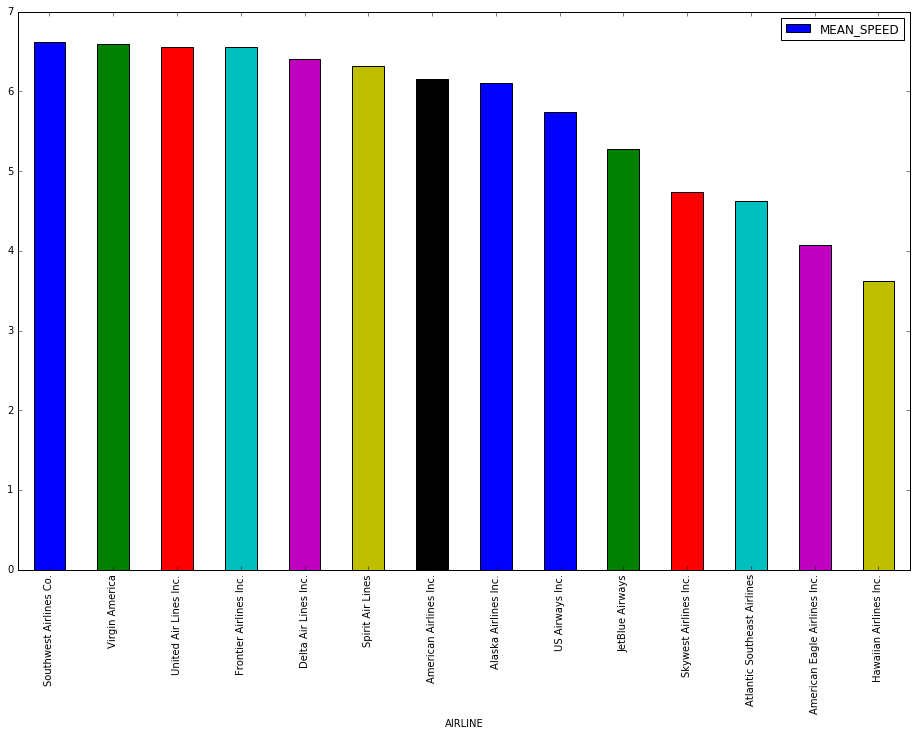

In [48]:
#Airlines by Speed
# plot = flights.sort_values(by=["SPEED"],ascending=False).plot(x="AIRLINE_NAME",y="SPEED",kind='bar')
airlines_data.sort_values(by=["MEAN_SPEED"],ascending=False).plot(x="AIRLINE",y="MEAN_SPEED",kind='bar')


Using all the previous metric, we will calculate ranking for airlines in simple way by giving points for each airline depending on each metric.

In [114]:
airlines_data["RANKING"]=0
tmp=airlines_data.sort_values(by=["ON_TIME_PERCENTAGE"],ascending=True).reset_index(drop=True)
tmp["RANKING"]=tmp.apply(lambda x: (x["RANKING"]+x.name),axis=1)

tmp=tmp.sort_values(by=["MEAN_SPEED"],ascending=True).reset_index(drop=True)
tmp["RANKING"]=tmp.apply(lambda x: (x["RANKING"]+x.name),axis=1)

tmp=tmp.sort_values(by=["MEAN_DEPARTURE_DELAY"],ascending=False).reset_index(drop=True)
tmp["RANKING"]=tmp.apply(lambda x: (x["RANKING"]+x.name),axis=1)

tmp=tmp.sort_values(by=["MEAN_DEPARTURE_AHEAD"],ascending=False).reset_index(drop=True)
tmp["RANKING"]=tmp.apply(lambda x: (x["RANKING"]+x.name),axis=1)

tmp=tmp.sort_values(by=["CANCELLED_PERCENTAGE"],ascending=False).reset_index(drop=True)
tmp["RANKING"]=tmp.apply(lambda x: (x["RANKING"]+x.name),axis=1)

tmp=tmp.sort_values(by=["DIVERTED_FLIGHTS"],ascending=False).reset_index(drop=True)
tmp["RANKING"]=tmp.apply(lambda x: (x["RANKING"]+x.name),axis=1)

(tmp.sort_values(by=["RANKING"],ascending=False))[["AIRLINE","RANKING"]]

,AIRLINE,RANKING
10,Virgin America,56
13,Hawaiian Airlines Inc.,56
0,Southwest Airlines Co.,53
9,Alaska Airlines Inc.,50
7,United Air Lines Inc.,49
3,Delta Air Lines Inc.,46
6,US Airways Inc.,41
12,Frontier Airlines Inc.,38
11,Spirit Air Lines,37
4,American Airlines Inc.,34


## ORIGIN_AIRPORT

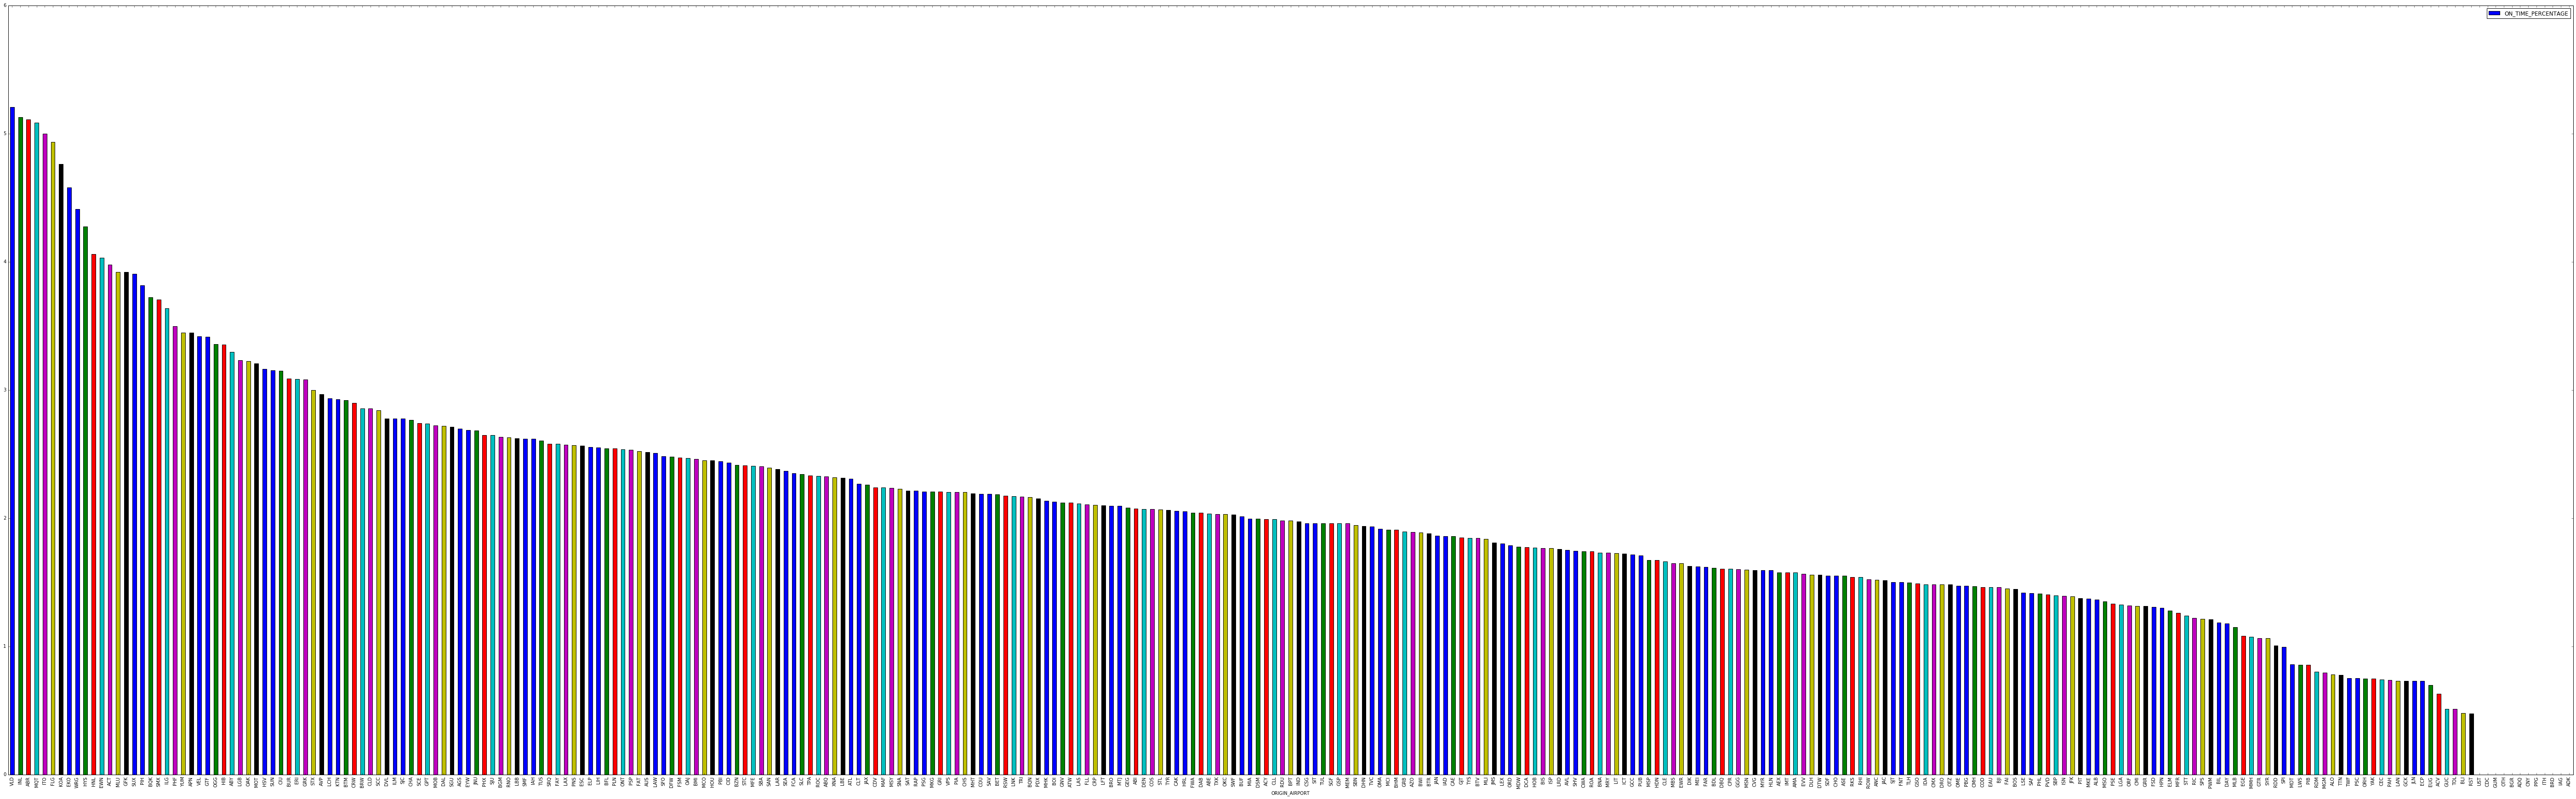

In [49]:
#Percentage by ORIGIN_AIRPORT
cancelled_flights_by_origin_airpot = flights_data
grouped_cancelled_flights_by_origin_airpot=cancelled_flights_by_origin_airpot[["ORIGIN_AIRPORT","CANCELLED","ON_TIME"]].groupby(['ORIGIN_AIRPORT']).sum().reset_index()
grouped_cancelled_flights_by_origin_airpot["FLIGHTS_COUNT"]=cancelled_flights_by_origin_airpot[["ORIGIN_AIRPORT","ON_TIME"]].groupby(['ORIGIN_AIRPORT']).count().reset_index()["ON_TIME"]
grouped_cancelled_flights_by_origin_airpot["CANCELLED_PERCENTAGE"]=grouped_cancelled_flights_by_origin_airpot["CANCELLED"]*1.0/grouped_cancelled_flights_by_origin_airpot["FLIGHTS_COUNT"]*100
grouped_cancelled_flights_by_origin_airpot["ON_TIME_PERCENTAGE"]=grouped_cancelled_flights_by_origin_airpot["ON_TIME"]*1.0/grouped_cancelled_flights_by_origin_airpot["FLIGHTS_COUNT"]*100
grouped_cancelled_flights_by_origin_airpot[["ORIGIN_AIRPORT","FLIGHTS_COUNT","CANCELLED","ON_TIME","CANCELLED_PERCENTAGE","ON_TIME_PERCENTAGE"]].sort_values(by=['ON_TIME_PERCENTAGE'],ascending=[False])
plt.figure();
# print(len(grouped_cancelled_flights_by_origin_airpot["ORIGIN_AIRPORT"]))
plot = grouped_cancelled_flights_by_origin_airpot.sort_values(by=["ON_TIME_PERCENTAGE"],ascending=False).plot(x="ORIGIN_AIRPORT",y="ON_TIME_PERCENTAGE",kind='bar',figsize=(100,30))